In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("D:\ML\kelulusan_mahasiswa.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPK                30 non-null     float64
 1   Jumlah_Absensi     30 non-null     int64  
 2   Waktu_Belajar_Jam  30 non-null     int64  
 3   Lulus              30 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.1 KB
None
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus
0  3.8               3                 10      1
1  2.5               8                  5      0
2  3.4               4                  7      1
3  2.1              12                  2      0
4  3.9               2                 12      1


IPK                  0
Jumlah_Absensi       0
Waktu_Belajar_Jam    0
Lulus                0
dtype: int64


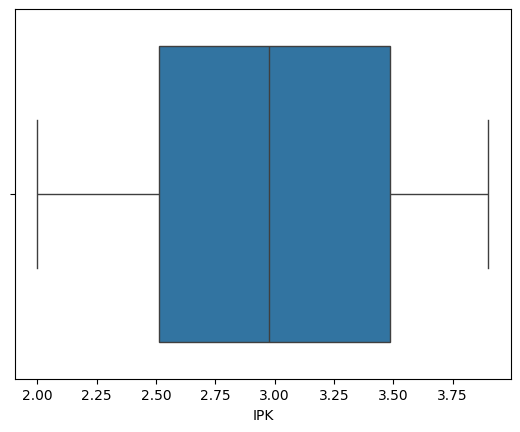

In [2]:
print(df.isnull().sum())
df = df.drop_duplicates()

import seaborn as sns
sns.boxplot(x=df['IPK'])
plt.show()

             IPK  Jumlah_Absensi  Waktu_Belajar_Jam      Lulus
count  30.000000       30.000000          30.000000  30.000000
mean    2.983333        6.533333           6.300000   0.500000
std     0.581812        2.979624           3.621297   0.508548
min     2.000000        2.000000           1.000000   0.000000
25%     2.512500        4.000000           3.000000   0.000000
50%     2.975000        6.000000           5.500000   0.500000
75%     3.487500        8.750000           9.000000   1.000000
max     3.900000       12.000000          13.000000   1.000000


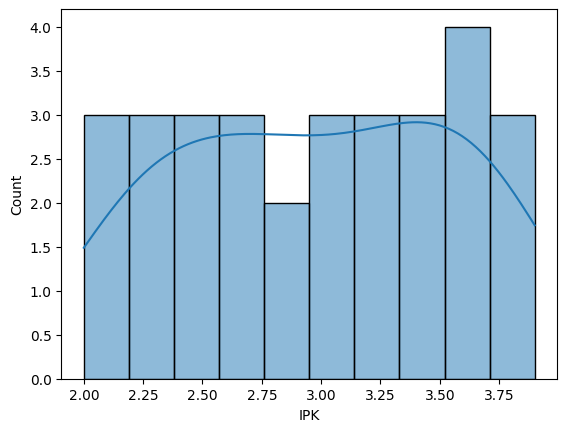

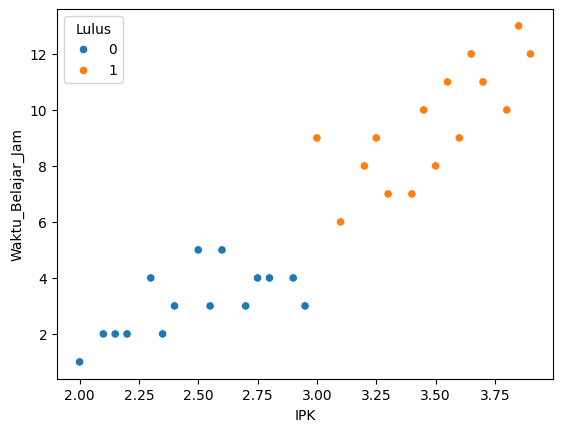

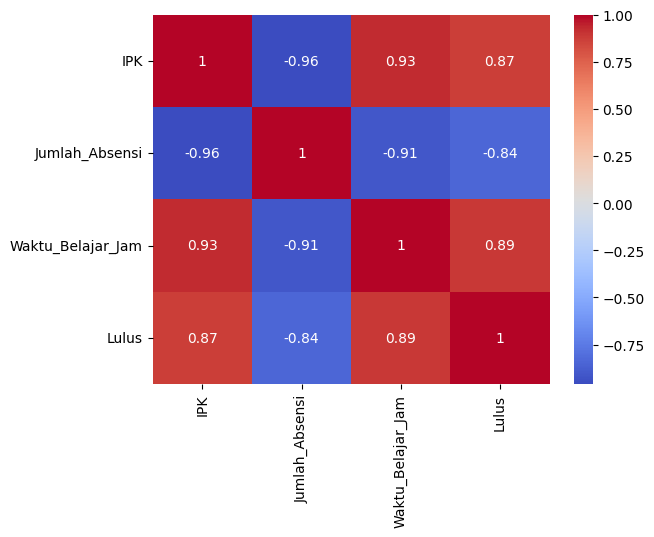

In [3]:
print(df.describe())
sns.histplot(df['IPK'], bins=10, kde=True)
plt.show()
sns.scatterplot(x='IPK', y='Waktu_Belajar_Jam', data=df, hue='Lulus')
plt.show()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [4]:
df['Rasio_Absensi'] = df['Jumlah_Absensi'] / 14
df['IPK_x_Study'] = df['IPK'] * df['Waktu_Belajar_Jam']
df.to_csv("processed_kelulusan.csv", index=False)

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Lulus', axis=1)
y = df['Lulus']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(21, 5) (4, 5) (5, 5)
